In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # matplotlib for plotting
import re # regular expressions
import warnings
warnings.filterwarnings("ignore") #because who likes annoying warnings

plt.style.use('ggplot') #prettier pictures

import datetime      #for datetime operations
import calendar      #for calendar for datetime operations
import time          #to get the system time
plt.rcParams['figure.figsize'] = [16, 10] #set default figure size

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

import pydotplus
from sklearn import tree
import collections

In [2]:
df = pd.read_csv('../data/clean_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436572 entries, 0 to 1436571
Data columns (total 26 columns):
Unnamed: 0                  1436572 non-null int64
id                          1436572 non-null object
vendor_id                   1436572 non-null int64
pickup_datetime             1436572 non-null object
dropoff_datetime            1436572 non-null object
passenger_count             1436572 non-null int64
pickup_longitude            1436572 non-null float64
pickup_latitude             1436572 non-null float64
dropoff_longitude           1436572 non-null float64
dropoff_latitude            1436572 non-null float64
store_and_fwd_flag          1436572 non-null int64
trip_duration               1436572 non-null int64
date                        1436572 non-null object
minimum temperature         1436572 non-null int64
precipitation               1436572 non-null float64
snow fall                   1436572 non-null float64
snow depth                  1436572 non-null float64
lo

In [31]:
#seperating into predictor and target variables

X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]

y = df['log_trip_duration'] #target variable

In [32]:
#random splitting 
#set random state for deterministic random probabilities
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

In [33]:
#model = DecisionTreeRegressor(max_depth=5,
#            max_features=None, max_leaf_nodes=None,
#            min_impurity_split=1e-07, min_samples_leaf=1,
#            min_samples_split=2, min_weight_fraction_leaf=0.0,
#            presort=False, splitter='best', random_state = 42)

model = DecisionTreeRegressor(max_depth = 5, random_state = 42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [34]:
print("R^2: {}".format(model.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Log Squared Error: {}".format(rmse))

R^2: 0.28418946438959414
Root Mean Log Squared Error: 0.6479021461560214


Using a decision tree regressor with max depth 5, we get RMLSE of 0.64. Did this just for the sake of arriving at a cleaner, more interpretable tree. To plot later. 

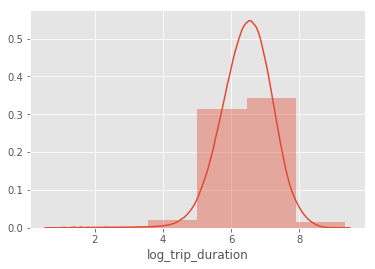

In [35]:
sns.distplot(df.log_trip_duration, bins = 6)

In [16]:
mean_dur = np.mean(df.log_trip_duration)
std_dur = np.std(df.log_trip_duration)

In [17]:
def to_bins(df):
    if ((df['log_trip_duration'] < (mean_dur - 2*std_dur))):
        return 0
    elif ((df['log_trip_duration'] >= (mean_dur - 2*std_dur)) & (df['log_trip_duration'] < (mean_dur - 1*std_dur))):
        return 1
    elif ((df['log_trip_duration'] >= (mean_dur - 1*std_dur)) & (df['log_trip_duration'] < (mean_dur))):
        return 2
    elif ((df['log_trip_duration'] >= (mean_dur)) & (df['log_trip_duration'] < (mean_dur + 1*std_dur))):
        return 3
    elif ((df['log_trip_duration'] >= (mean_dur + 1*std_dur)) & (df['log_trip_duration'] < (mean_dur + 2*std_dur))):
        return 4
    elif ((df['log_trip_duration'] >= (mean_dur + 2*std_dur))):
        return 5
    else:
        return df.log_trip_duration

Splitting log_trip_duration into normally separated bins
The bins represent which section of the normally separated log_trip_duration they are in

Values are as follows:

- 0 : less than mean - 2 std
- 1 : between mean - 2 std and mean - 1 std
- 2 : between mean -1 std and mean
- 3 : between mean and mean + 1 std
- 4 : between mean + 1 std and mean + 2 std
- 5 : more than mean + 2 std

In [18]:
df['duration_bins'] =  df.apply(to_bins, axis = 1)

In [19]:
df['duration_bins'].value_counts()

3    534329
2    480808
4    190238
1    173225
0     36200
5     21772
Name: duration_bins, dtype: int64

In [20]:
df['duration_bins'] = df['duration_bins'].astype('category')

In [22]:
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
y = df['duration_bins'] #target variable

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42, stratify = y)

In [24]:
model = DecisionTreeClassifier(max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, splitter='best', random_state = 42)
dtree = model.fit(X_train,y_train)
data_feature_names = X.columns

C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print('Accuracy of the model is : ' + str(model.score(X_test, y_test)))
print('-----')
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
print('-----')
print('The Confusion Matrix :')
print(confusion_matrix(y_test,y_pred ))
print('-----')
print('Classification Report :')
print(classification_report(y_test, y_pred))

Accuracy of the model is : 0.43938534361241144
-----
Misclassified samples: 161073
-----
The Confusion Matrix :
[[  180     0  6839   221     0     0]
 [   17     0 33573  1055     0     0]
 [    8     0 89409  6717    27     1]
 [    6     0 80505 22203  4152     0]
 [    7     0 14274  9482 13845   440]
 [    9     0   257   277  3206   605]]
-----
Classification Report :
              precision    recall  f1-score   support

           0       0.79      0.02      0.05      7240
           1       0.00      0.00      0.00     34645
           2       0.40      0.93      0.56     96162
           3       0.56      0.21      0.30    106866
           4       0.65      0.36      0.47     38048
           5       0.58      0.14      0.22      4354

   micro avg       0.44      0.44      0.44    287315
   macro avg       0.50      0.28      0.27    287315
weighted avg       0.45      0.44      0.37    287315



In [25]:
dot_data = tree.export_graphviz(dtree,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

        #writing the tree figure to disk
graph.write_png('../data/tree.png')

True

In [26]:
west, south, east, north = -74.03, 40.63, -73.77, 40.85 #setting NYC coordinate boundaries

In [27]:
#functions taken from the following website to draw decision boundaries
#credit to the author: kazemakase
#https://stackoverflow.com/questions/43929400/retrieve-decision-boundary-lines-x-y-coordinate-format-from-sklearn-decision-t

from collections import deque
from sklearn.tree import _tree as ctree
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


class AABB:
    """Axis-aligned bounding box"""
    def __init__(self, n_features):
        self.limits = np.array([[-np.inf, np.inf]] * n_features)

    def split(self, f, v):
        left = AABB(self.limits.shape[0])
        right = AABB(self.limits.shape[0])
        left.limits = self.limits.copy()
        right.limits = self.limits.copy()

        left.limits[f, 1] = v
        right.limits[f, 0] = v

        return left, right


def tree_bounds(tree, n_features=None):
    """Compute final decision rule for each node in tree"""
    if n_features is None:
        n_features = np.max(tree.feature) + 1
    aabbs = [AABB(n_features) for _ in range(tree.node_count)]
    queue = deque([0])
    while queue:
        i = queue.pop()
        l = tree.children_left[i]
        r = tree.children_right[i]
        if l != ctree.TREE_LEAF:
            aabbs[l], aabbs[r] = aabbs[i].split(tree.feature[i], tree.threshold[i])
            queue.extend([l, r])
    return aabbs


def decision_areas(tree_classifier, maxrange, x=0, y=1, n_features=None):
    """ Extract decision areas.

    tree_classifier: Instance of a sklearn.tree.DecisionTreeClassifier
    maxrange: values to insert for [left, right, top, bottom] if the interval is open (+/-inf) 
    x: index of the feature that goes on the x axis
    y: index of the feature that goes on the y axis
    n_features: override autodetection of number of features
    """
    tree = tree_classifier.tree_
    aabbs = tree_bounds(tree, n_features)

    rectangles = []
    for i in range(len(aabbs)):
        if tree.children_left[i] != ctree.TREE_LEAF:
            continue
        l = aabbs[i].limits
        r = [l[x, 0], l[x, 1], l[y, 0], l[y, 1], np.argmax(tree.value[i])]
        rectangles.append(r)
    rectangles = np.array(rectangles)
    rectangles[:, [0, 2]] = np.maximum(rectangles[:, [0, 2]], maxrange[0::2])
    rectangles[:, [1, 3]] = np.minimum(rectangles[:, [1, 3]], maxrange[1::2])
    return rectangles

def plot_areas(rectangles):
    for rect in rectangles:
        color = ['b', 'r', 'g', 'magenta', 'yellow', 'purple'][int(rect[4])]
        print(rect[0], rect[1], rect[2] - rect[0], rect[3] - rect[1])
        rp = Rectangle([rect[0], rect[2]], 
                       rect[1] - rect[0], 
                       rect[3] - rect[2], color=color, alpha=0.3)
        plt.gca().add_artist(rp)

-74.03 -73.88598251342773 114.66 114.62300682067871
-74.03 -73.88598251342773 114.66 114.62300682067871
-74.03 -73.88598251342773 114.76702430725098 114.73598251342773
-74.03 -73.88598251342773 114.76702430725098 114.73598251342773
-74.03 -73.88598251342773 114.66 114.60848045349121
-74.03 -73.88598251342773 114.66 114.60848045349121
-74.03 -73.88598251342773 114.75249794006348 114.73598251342773
-74.03 -73.88598251342773 114.75249794006348 114.73598251342773
-74.03 -73.97015762329102 114.66 114.82015762329101
-73.97015762329102 -73.94524002075195 114.60015762329101 114.79524002075195
-74.03 -73.94524002075195 114.66 114.79524002075195
-74.03 -73.94524002075195 114.66 114.79524002075195
-73.94524002075195 -73.93268203735352 114.57524002075195 114.78268203735351
-73.93268203735352 -73.88598251342773 114.56268203735351 114.73598251342773
-73.94524002075195 -73.88598251342773 114.57524002075195 114.73598251342773
-73.94524002075195 -73.88598251342773 114.57524002075195 114.73598251342773


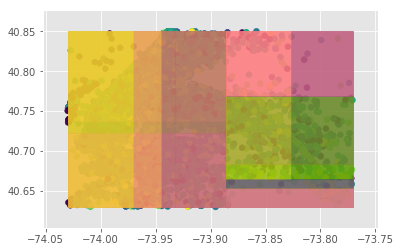

In [28]:
rectangles = decision_areas(dtree, [west, east, south, north], x=0, y=1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
plot_areas(rectangles)

Using Decision Trees as a classifier to using geolocation data as predictor variables for the log_trip_duration bins doesn't seem to work too well. This is probably because as we've seen in the clustering models, there are a variety of trips taken throughout each cluster. In many of the clusters, taxi trips tend to stay within the same cluster, which means that the trip distance is short. However, given that this is Manhattan, that does not exactly translate to shorter trip duration either, because of traffic and public events. When we observe the plot above, we see that the majority of the map is either yellow or magenta/pink. This would suggest that many of our geolocational data point towards the log_trip_duration taking around the mean amount of time. We know that yellow is slightly above the mean duration and we can see that it intuitively covers the area known as downtown/midtown of Manhattan. However, this plot and model must be viewed with a grain of salt, since its RMLSE error metric was relatively high compared to even just simple linear regression.